### Load Modules

In [1]:
# Essential Imports
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

#Dataset repo
from ucimlrepo import fetch_ucirepo

# Models Import
from algorithms import CustomKNNClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Load Datasets and Set Hyperparameters

In [2]:
# KNN Classifier hyperparameters

k = 5
metric = 'euclidean'

In [3]:
# Datasets stored in a dictionary. Datasets are fetched from ucimlrepo using fetch_ucimlrepo method.

dataset_dict = {
    0 : {
        'label' : 'd2',
        'name' : 'Breast Cancer',
        'data' : fetch_ucirepo(id=17)
    },
    1 : {
        'label' : 'd3',
        'name' : 'Wine Quality',
        'data' : fetch_ucirepo(id=186)
    }
}

In [4]:
# Classifiers stored in a dictionary. 

classifiers = {
    'c1' : {
        'name' : 'CustomKNNClassifier',
        'model' : CustomKNNClassifier(k=k, metric=metric),
    },
    'c2' : {
        'name' : 'KNeighboursClassifier',
        'model' : KNeighborsClassifier(n_neighbors=k, metric=metric)
    },
    'c3' : {
        'name' : 'GaussianNB',
        'model' : GaussianNB()
    }
}

In [5]:
# Helper Classes and Functions

class Classifier:
    """
    A wrapper class for training and evaluating machine learning models.

    Parameters:
        model (object): The machine learning model to be trained and evaluated.
        X_train (array-like): Training feature matrix.
        y_train (array-like): Training labels.
        X_test (array-like): Test feature matrix.
        y_true (array-like): True labels for the test set.
    """
    def __init__(self, model, X_train, y_train, X_test, y_true):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_true = y_true
        
        # attributes to store results and metric
        self.y_pred = None
        self.train_time = None
        self.predict_time = None
        self.accuracy = None
        self.precision = None
        self.recall = None
        self.conf_matrix = None

    def fit(self):
        """
        Trains the model on the training data and records the training time.
        """
        start_train = time.time()
        self.model = self.model.fit(self.X_train,self.y_train)
        self.train_time = time.time() - start_train
    
    def predict(self):
        """
        Makes predictions on the test data, calculates prediction time, 
        and computes evaluation metrics.

        Returns:
            np.array: Predicted labels for the test set.
        """
        start_predict = time.time()
        self.y_pred = self.model.predict(self.X_test)
        self.predict_time = time.time() - start_predict

        
        if len(set(self.y_pred)) == 2:
            self._calculate_metrics(average='binary', pos_label=set(self.y_pred).pop())
        else:
            self._calculate_metrics(average='weighted')

        return self.y_pred
    
    def _calculate_metrics(self, average, pos_label=None):
        """
        Computes accuracy, precision, recall, and confusion matrix for the predictions.

        Args:
            average (str): Averaging method for precision and recall ('binary' or 'weighted').
            pos_label (int/str, optional): Positive class label for binary classification.
        """
        self.accuracy = accuracy_score(y_true=self.y_true, y_pred=self.y_pred)
        self.recall = recall_score(y_true=self.y_true, y_pred=self.y_pred, average=average,pos_label=pos_label)
        self.precision = precision_score(y_true=self.y_true, y_pred=self.y_pred, average=average, pos_label=pos_label, zero_division=1)
        self.conf_matrix = confusion_matrix(y_true=self.y_true, y_pred=self.y_pred)


### Dataset - 1: Breast Cancer Wisconsin Diagnostic

In [6]:
# Data Load, Preprocessing and Splitting
wdbc = dataset_dict.get(0)

wdbc_label = wdbc['label']
wdbc_X = wdbc['data'].data.features.to_numpy()
wdbc_y = wdbc['data'].data.targets.to_numpy().flatten()


# Standardizing Features data
sc = StandardScaler()
wdbc_X = sc.fit_transform(wdbc_X)


wdbc_X_train, wdbc_X_test, wdbc_y_train, wdbc_y_test = train_test_split(wdbc_X, wdbc_y, test_size=0.2, stratify=wdbc_y, random_state=42)

print(wdbc_X_train.shape, wdbc_X_test.shape)
print(wdbc_y_train.shape, wdbc_y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


Evaluate the models on Breast Cancer Wisconsin Diagnostic Dataset

Classifier -  CustomKNNClassifier  | Dataset - Breast Cancer
Test Accuracy -  0.956140350877193
Recall Accuracy -  0.9861111111111112
Precision Accuracy -  0.9466666666666667
Training time -  1.9073486328125e-06
Prediction time -  0.13322114944458008
Confusion Matrix - 
 [[71  1]
 [ 4 38]]


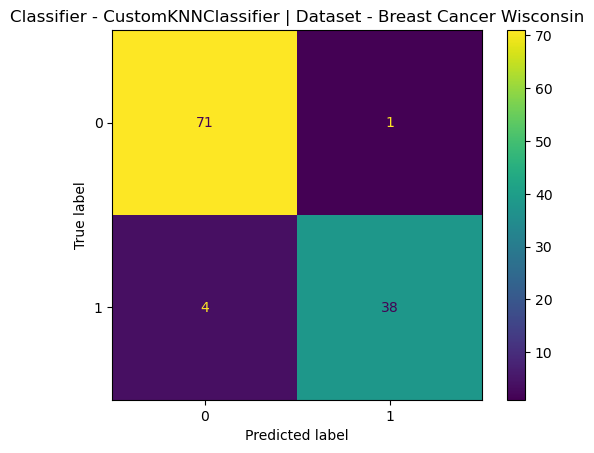

--------------------------------------------------
Classifier -  KNeighboursClassifier  | Dataset - Breast Cancer
Test Accuracy -  0.956140350877193
Recall Accuracy -  0.9861111111111112
Precision Accuracy -  0.9466666666666667
Training time -  0.0006699562072753906
Prediction time -  0.037180185317993164
Confusion Matrix - 
 [[71  1]
 [ 4 38]]


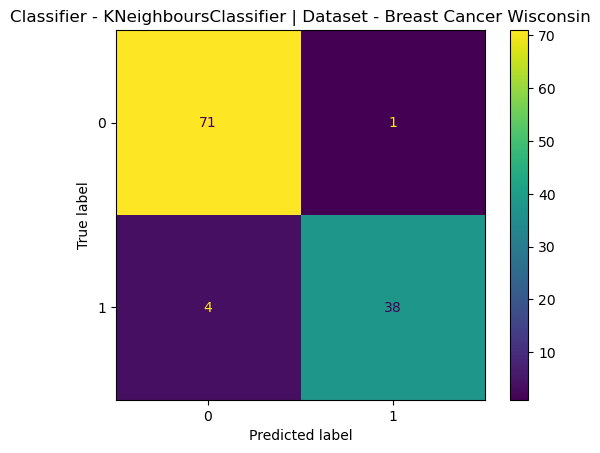

--------------------------------------------------
Classifier -  GaussianNB  | Dataset - Breast Cancer
Test Accuracy -  0.9210526315789473
Recall Accuracy -  0.9583333333333334
Precision Accuracy -  0.92
Training time -  0.0017290115356445312
Prediction time -  0.0002808570861816406
Confusion Matrix - 
 [[69  3]
 [ 6 36]]


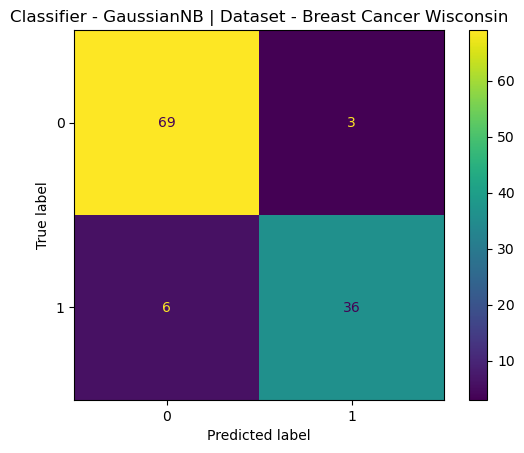

--------------------------------------------------


In [7]:
for cf_label, cf in classifiers.items():
    model = Classifier(model=cf['model'], X_train=wdbc_X_train, y_train=wdbc_y_train, X_test=wdbc_X_test, y_true=wdbc_y_test)

    model.fit()
    y_pred = model.predict()

    df = pd.DataFrame(model.conf_matrix,
                        index=[f'Actual_{i}' for i in range(model.conf_matrix.shape[0])],
                        columns=[f'Pred_{i}' for i in range(model.conf_matrix.shape[1])])
    
    df.to_csv(f'g008_{wdbc_label}_{cf_label}.csv')
    
    disp = ConfusionMatrixDisplay(confusion_matrix=model.conf_matrix)

    print('Classifier - ', cf['name'], ' | Dataset - Breast Cancer',)
    print('Test Accuracy - ', model.accuracy)
    print('Recall Accuracy - ', model.recall)
    print('Precision Accuracy - ', model.precision)
    print('Training time - ', model.train_time)
    print('Prediction time - ', model.predict_time)
    print(f'Confusion Matrix - \n', model.conf_matrix)
    disp.plot()

    plt.title(label=f'Classifier - {cf['name']} | Dataset - Breast Cancer Wisconsin')
    plt.show()
    print('-' * 50)

### Dataset - 2: Wine Quality

In [8]:
# Data Load, Preprocessing and Splitting
wine_quality = dataset_dict.get(1)

wine_quality_label = wine_quality['label']
wine_quality_X = wine_quality['data'].data.features.to_numpy()
wine_quality_y = wine_quality['data'].data.targets.to_numpy().flatten()


# Standardizing Features data
sc = StandardScaler()
wine_quality_X = sc.fit_transform(wine_quality_X)


wine_quality_X_train, wine_quality_X_test, wine_quality_y_train, wine_quality_y_test = train_test_split(wine_quality_X, wine_quality_y, test_size=0.2, stratify=wine_quality_y, random_state=42)

print(wine_quality_X_train.shape, wine_quality_X_test.shape)

(5197, 11) (1300, 11)


Evaluate the models on Wine Quality Dataset

Classifier -  CustomKNNClassifier  | Dataset - Wine Quality
Test Accuracy -  0.5723076923076923
Recall Accuracy -  0.5723076923076923
Precision Accuracy -  0.5652015525359217
Training time -  5.9604644775390625e-06
Prediction time -  15.990351915359497
Confusion Matrix - 
 [[  0   1   2   2   1   0   0]
 [  0   4  22  16   1   0   0]
 [  0   9 255 149  13   2   0]
 [  0   5 128 356  69   9   0]
 [  0   0  14  77 121   4   0]
 [  0   0   2   8  21   8   0]
 [  0   0   0   0   1   0   0]]


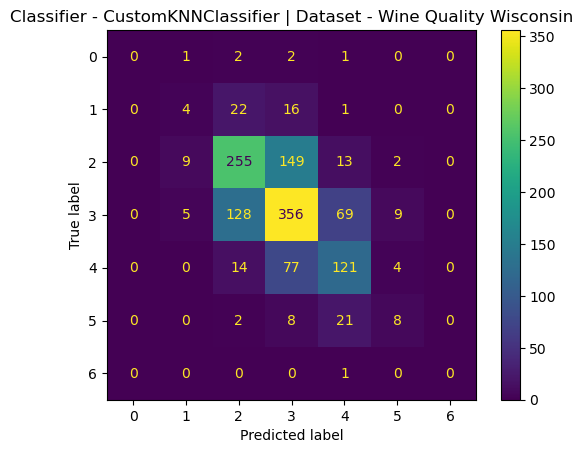

--------------------------------------------------
Classifier -  KNeighboursClassifier  | Dataset - Wine Quality
Test Accuracy -  0.5576923076923077
Recall Accuracy -  0.5576923076923077
Precision Accuracy -  0.5486710647584722
Training time -  0.001894235610961914
Prediction time -  0.04227709770202637
Confusion Matrix - 
 [[  0   1   2   2   1   0   0]
 [  0   4  23  15   1   0   0]
 [  0  14 260 141  11   2   0]
 [  0   8 141 352  60   6   0]
 [  0   0  19  91 105   1   0]
 [  0   0   2  11  22   4   0]
 [  0   0   0   0   1   0   0]]


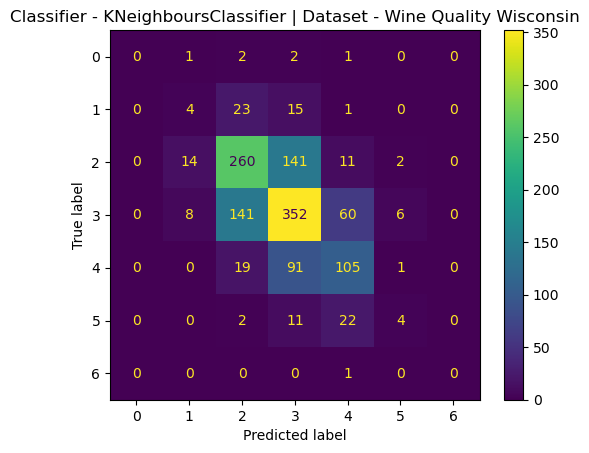

--------------------------------------------------
Classifier -  GaussianNB  | Dataset - Wine Quality
Test Accuracy -  0.4276923076923077
Recall Accuracy -  0.4276923076923077
Precision Accuracy -  0.4461116925603208
Training time -  0.0013201236724853516
Prediction time -  0.00042891502380371094
Confusion Matrix - 
 [[  2   1   2   0   1   0   0]
 [  3   6  15  11   7   1   0]
 [  8  13 205 164  37   1   0]
 [  5   7 146 231 163  15   0]
 [  2   0  16  67 108  23   0]
 [  0   0   5  12  18   4   0]
 [  0   0   0   0   1   0   0]]


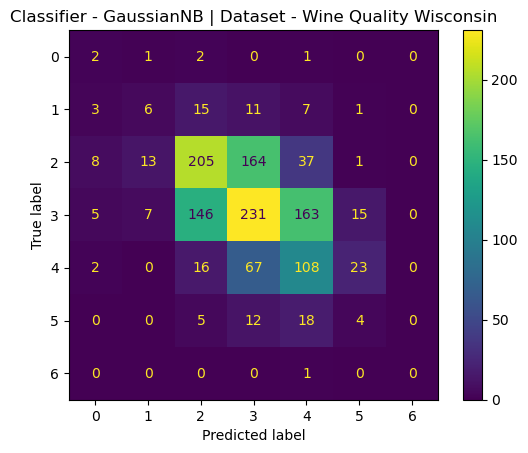

--------------------------------------------------


In [9]:
for cf_label, cf in classifiers.items():
    model = Classifier(model=cf['model'], X_train=wine_quality_X_train, y_train=wine_quality_y_train, X_test=wine_quality_X_test, y_true=wine_quality_y_test)

    model.fit()
    y_pred = model.predict()

    df = pd.DataFrame(model.conf_matrix,
                        index=[f'Actual_{i}' for i in range(model.conf_matrix.shape[0])],
                        columns=[f'Pred_{i}' for i in range(model.conf_matrix.shape[1])])
    
    df.to_csv(f'g008_{wine_quality_label}_{cf_label}.csv')
    
    disp = ConfusionMatrixDisplay(confusion_matrix=model.conf_matrix)

    print('Classifier - ', cf['name'], ' | Dataset - Wine Quality',)
    print('Test Accuracy - ', model.accuracy)
    print('Recall Accuracy - ', model.recall)
    print('Precision Accuracy - ', model.precision)
    print('Training time - ', model.train_time)
    print('Prediction time - ', model.predict_time)
    print(f'Confusion Matrix - \n', model.conf_matrix)
    disp.plot()

    plt.title(label=f'Classifier - {cf['name']} | Dataset - Wine Quality Wisconsin')
    plt.show()
    print('-' * 50)

### Optimal k value Analysis for KNN Classifiers (CustomKNNClassifier, KNeighborsClassifier)

_Note: The following code snippets will take longer runtime. Run them only if required_

Breast Cancer Quality Dataset

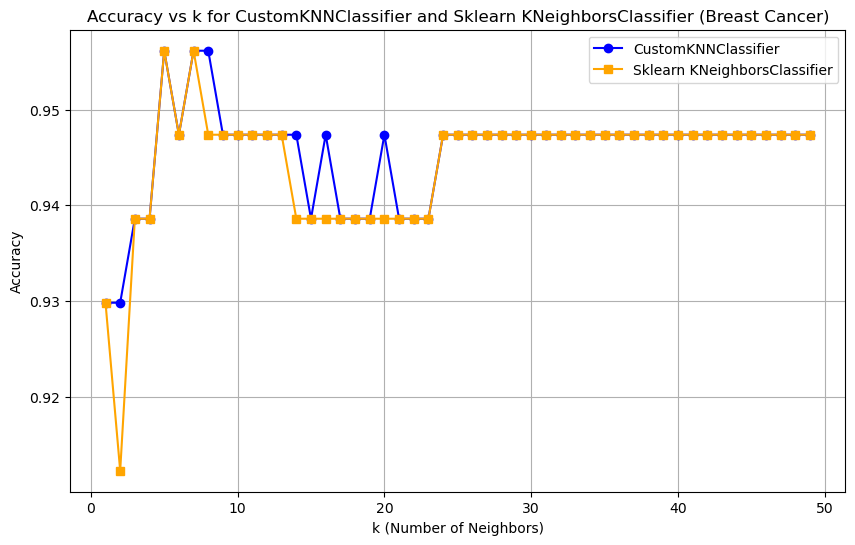

Optimal k for CustomKNNClassifier: 5, Accuracy: 0.9561
Optimal k for Sklearn KNeighborsClassifier: 5, Accuracy: 0.9561


In [10]:
# Range of k values to test
k_range = range(1, 50)

# Store cross-validation scores
custom_accuracies = []
sklearn_accuracies = []

# Perform cross-validation for each k for both classifiers
for k in k_range:
    # CustomKNNClassifier
    custom_knn = Classifier(model=CustomKNNClassifier(k=k, metric='euclidean'), X_train=wdbc_X_train, y_train=wdbc_y_train, X_test=wdbc_X_test, y_true=wdbc_y_test)
    custom_knn.fit()
    custom_knn_y_pred = custom_knn.predict()
    custom_accuracies.append(custom_knn.accuracy)

    # SklearnClassifier
    sklearn_knn = Classifier(model=KNeighborsClassifier(n_neighbors=k, metric='euclidean'), X_train=wdbc_X_train, y_train=wdbc_y_train, X_test=wdbc_X_test, y_true=wdbc_y_test)
    sklearn_knn.fit()
    sklearn_knn_y_pred = sklearn_knn.predict()
    sklearn_accuracies.append(sklearn_knn.accuracy)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, custom_accuracies, marker='o', label='CustomKNNClassifier', color='blue')
plt.plot(k_range, sklearn_accuracies, marker='s', label='Sklearn KNeighborsClassifier', color='orange')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for CustomKNNClassifier and Sklearn KNeighborsClassifier (Breast Cancer)')
plt.legend()
plt.grid()
plt.show()

# Find the optimal k for each classifier
optimal_k_custom = k_range[np.argmax(custom_accuracies)]
optimal_k_sklearn = k_range[np.argmax(sklearn_accuracies)]
print(f"Optimal k for CustomKNNClassifier: {optimal_k_custom}, Accuracy: {max(custom_accuracies):.4f}")
print(f"Optimal k for Sklearn KNeighborsClassifier: {optimal_k_sklearn}, Accuracy: {max(sklearn_accuracies):.4f}")


Wine Quality Dataset

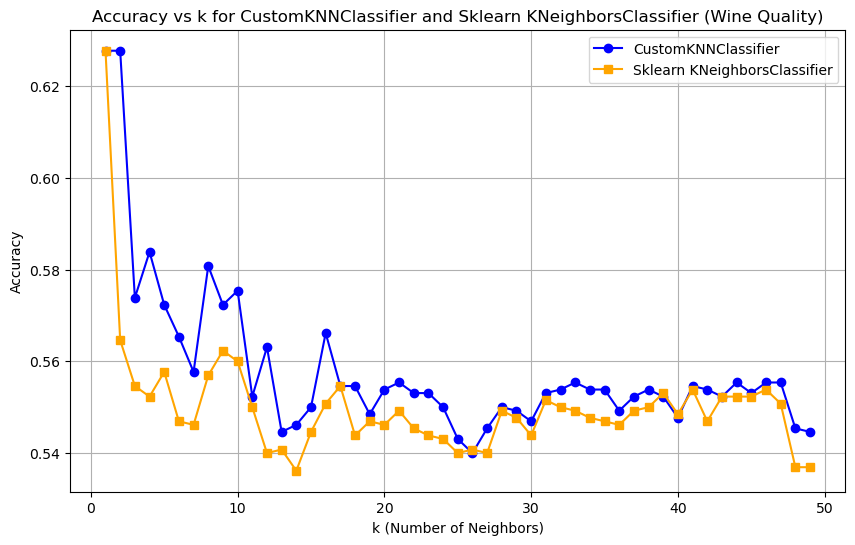

Optimal k for CustomKNNClassifier: 1, Accuracy: 0.6277
Optimal k for Sklearn KNeighborsClassifier: 1, Accuracy: 0.6277


In [11]:
# Range of k values to test
k_range = range(1, 50)

# Store cross-validation scores
custom_accuracies = []
sklearn_accuracies = []

# Perform cross-validation for each k for both classifiers
for k in k_range:
    # CustomKNNClassifier
    custom_knn = Classifier(model=CustomKNNClassifier(k=k, metric='euclidean'), X_train=wine_quality_X_train, y_train=wine_quality_y_train, X_test=wine_quality_X_test, y_true=wine_quality_y_test)
    custom_knn.fit()
    custom_knn_y_pred = custom_knn.predict()
    custom_accuracies.append(custom_knn.accuracy)

    # SKlearnClassifier
    sklearn_knn = Classifier(model=KNeighborsClassifier(n_neighbors=k, metric='euclidean'), X_train=wine_quality_X_train, y_train=wine_quality_y_train, X_test=wine_quality_X_test, y_true=wine_quality_y_test)
    sklearn_knn.fit()
    sklearn_knn_y_pred = sklearn_knn.predict()
    sklearn_accuracies.append(sklearn_knn.accuracy)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, custom_accuracies, marker='o', label='CustomKNNClassifier', color='blue')
plt.plot(k_range, sklearn_accuracies, marker='s', label='Sklearn KNeighborsClassifier', color='orange')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for CustomKNNClassifier and Sklearn KNeighborsClassifier (Wine Quality)')
plt.legend()
plt.grid()
plt.show()

# Find the optimal k for each classifier
optimal_k_custom = k_range[np.argmax(custom_accuracies)]
optimal_k_sklearn = k_range[np.argmax(sklearn_accuracies)]
print(f"Optimal k for CustomKNNClassifier: {optimal_k_custom}, Accuracy: {max(custom_accuracies):.4f}")
print(f"Optimal k for Sklearn KNeighborsClassifier: {optimal_k_sklearn}, Accuracy: {max(sklearn_accuracies):.4f}")